In [89]:
from src.plots import plot_boolean_impact
%load_ext autoreload
%autoreload 2

import pandas as pd

from src.cleaning import clean_data, CleaningConfig
from src.utils import DEV_SET_RAW_PATH, analizar_columnas_categoricas, CATEGORICAL_COLS, TARGET

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
df = pd.read_csv("../" + DEV_SET_RAW_PATH, low_memory=False)

In [13]:
df.head(5)

,id_grid,MesListing,TIPOPROPIEDAD,STotalM2,SConstrM2,Dormitorios,Banos,Ambientes,SitioOrigen,Amoblado,...,CanchaTennis,AreaCine,ITE_ADD_CITY_NAME,ITE_ADD_STATE_NAME,ITE_ADD_NEIGHBORHOOD_NAME,ITE_TIPO_PROD,LONGITUDE,LATITUDE,precio_pesos_constantes,year
0,59362,2022-08-01,Departamento,39.0,36.0,1,1,2,NaN,0.0,...,0.0,NaN,Caseros,Bs.As. G.B.A. Oeste,Caseros,N,-58.566145,-34.599299,6.279294e+03,2022
1,68287,2021-04-01,Departamento,47.0,40.0,1,1,2,0,No,...,0,0,Capital Federal,Capital Federal,Núñez,U,-58.473708,-34.551759,1.092339e+04,2021
2,59774,2021-09-01,Departamento,128.0,63.0,1,1,3,0,No,...,0,0,Capital Federal,Capital Federal,NaN,U,-58.385136,-34.599685,1.081992e+04,2021
3,62402,2022-11-01,Departamento,436.0,436.0,2,3,8,NaN,NaN,...,0.0,NaN,Capital Federal,Capital Federal,Recoleta,U,-58.393617,-34.585162,1.230069e+05,2022
4,57804,2021-04-01,Departamento,300.0,300.0,2,4,6,0,No,...,No,0,Capital Federal,Capital Federal,Monserrat,U,-58.376592,-34.610603,7.714647e+06,2021


In [14]:
df.shape

(278725, 45)

In [41]:
N_SAMPLES = df.shape[0]

270715

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278725 entries, 0 to 278724
Data columns (total 45 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_grid                    278725 non-null  int64  
 1   MesListing                 278725 non-null  object 
 2   TIPOPROPIEDAD              278725 non-null  object 
 3   STotalM2                   278705 non-null  float64
 4   SConstrM2                  278705 non-null  float64
 5   Dormitorios                278725 non-null  int64  
 6   Banos                      278725 non-null  int64  
 7   Ambientes                  278725 non-null  int64  
 8   SitioOrigen                188004 non-null  object 
 9   Amoblado                   246475 non-null  object 
 10  Antiguedad                 252752 non-null  object 
 11  Cisterna                   188004 non-null  object 
 12  AccesoInternet             247673 non-null  object 
 13  BusinessCenter             20

In [28]:
print(f"Filas duplicadas: {int(df.duplicated().sum())}")

Filas duplicadas: 8010


In [42]:
df.drop_duplicates(inplace=True)
N_SAMPLES = df.shape[0]
N_SAMPLES

270715

In [58]:
df.describe(include="all")

,id_grid,MesListing,TIPOPROPIEDAD,STotalM2,SConstrM2,Dormitorios,Banos,Ambientes,SitioOrigen,Amoblado,...,CanchaTennis,AreaCine,ITE_ADD_CITY_NAME,ITE_ADD_STATE_NAME,ITE_ADD_NEIGHBORHOOD_NAME,ITE_TIPO_PROD,LONGITUDE,LATITUDE,precio_pesos_constantes,year
count,270715.000000,270715,270715,2.706950e+05,2.706950e+05,270715.000000,270715.000000,270715.000000,186007,240403,...,203925,186007,270715,270715,258095,270715,270715.000000,270715.000000,2.707150e+05,270715.000000
unique,NaN,24,1,NaN,NaN,NaN,NaN,NaN,4,7,...,7,3,39,4,503,3,NaN,NaN,NaN,NaN
top,NaN,2021-08-01,Departamento,NaN,NaN,NaN,NaN,NaN,0,No,...,0,0,Capital Federal,Capital Federal,Palermo,U,NaN,NaN,NaN,NaN
freq,NaN,13126,270715,NaN,NaN,NaN,NaN,NaN,131280,115862,...,122557,174241,153709,153869,15541,198204,NaN,NaN,NaN,NaN
mean,59783.357649,NaN,NaN,3.847776e+03,3.455932e+04,1.423708,1.335297,2.390880,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-58.481007,-34.598213,8.215410e+04,2021.472172
std,14743.238038,NaN,NaN,9.631862e+05,8.538813e+06,1.203947,1.030403,1.398603,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.115097,0.081543,6.757349e+05,0.499226
min,124.000000,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,-1.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-58.874595,-34.923504,4.264038e+01,2021.000000
25%,53517.000000,NaN,NaN,3.800000e+01,3.600000e+01,1.000000,1.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-58.543363,-34.632289,6.568300e+03,2021.000000
50%,60080.000000,NaN,NaN,5.000000e+01,4.600000e+01,1.000000,1.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-58.449924,-34.597885,9.166979e+03,2021.000000
75%,65657.000000,NaN,NaN,7.600000e+01,7.000000e+01,2.000000,1.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-58.400915,-34.566651,1.866683e+04,2022.000000


In [55]:
analizar_columnas_categoricas(df, CATEGORICAL_COLS)

--- Columna: TIPOPROPIEDAD ---
Valores únicos, conteo y porcentaje:
  - Departamento: 270715 (100.00%)

Cantidad de NaN: 0 (0.00%)
Potencialmente booleana?: No
-----------------------------

--- Columna: MesListing ---
Valores únicos, conteo y porcentaje:
  - 2021-08-01: 13126 (4.85%)
  - 2021-07-01: 12559 (4.64%)
  - 2021-09-01: 12484 (4.61%)
  - 2021-06-01: 12438 (4.59%)
  - 2021-11-01: 12258 (4.53%)
  - 2021-10-01: 12195 (4.50%)
  - 2021-01-01: 12029 (4.44%)
  - 2021-05-01: 11401 (4.21%)
  - 2021-12-01: 11323 (4.18%)
  - 2022-01-01: 11310 (4.18%)
  - 2022-03-01: 11202 (4.14%)
  - 2021-03-01: 11169 (4.13%)
  - 2021-02-01: 11016 (4.07%)
  - 2022-11-01: 10951 (4.05%)
  - 2021-04-01: 10893 (4.02%)
  - 2022-06-01: 10701 (3.95%)
  - 2022-05-01: 10684 (3.95%)
  - 2022-08-01: 10626 (3.93%)
  - 2022-07-01: 10624 (3.92%)
  - 2022-10-01: 10602 (3.92%)
  - 2022-02-01: 10582 (3.91%)
  - 2022-09-01: 10479 (3.87%)
  - 2022-12-01: 10068 (3.72%)
  - 2022-04-01: 9995 (3.69%)

Cantidad de NaN: 0 (0.00

Columnas a eliminar:
- PistaJogging - todos null o 0
- Lobby - Todos null o 0
- LocalesComerciales - Todos null o 0
- AreaParrillas - Todos null o 0
- TIPOPROPIEDAD - todas son departamentos
- SitioOrigen - solo 9 son útiles
- SistContraIncendios: solo 3 sí
- AreaCine: nada útil

Preprocesamientos que hay que hacer:
- Amoblado, Gimnasio, Laundry, Calefacción, SalonDeUsosMul, AireAC, Recepcion, Jacuzzi, Seguridad, Pileta: convertir a binario
- Antiguedad: convertir a número (tomar los primeros 2 chars)
- ITE_ADD_CITY_NAME, ITE_ADD_NEIGHBORHOOD_NAME: buscar manera de categorizar, son muchas categorías
- ITE_ADD_STATE_NAME, ITE_TIPO_PROD: one hot
- Cocheras, Banos: tienen valores negativos (imposibles) -- reemplazar por nan
- Superficies: tienen valores en 0, reemplazar por NaN
- Superficies: superficie total no puede se menor que la construida -- reemplazar SConstrM2 por NaN en estos casos
- Ambientes, Dormitorios: Hay casos en los que Dormitorios > Ambientes -- Reemplazar Dormitorios por NaN

A analizar:
- Cisterna, BusinessCenter, AreaJuegosInfantiles, Chimenea, EstacionamientoVisitas, CanchaTennis: hay muy pocos sí -- tienen algún efecto sobre el precio? Si no, dropear
- AccesoInternet: muy raro que haya tantas propiedades sin acceso a internet.
- Estacionamiento: Raro que tan pocos tengan estacionamiento
- Ascensor: raro que haya tan pocos ascensores siendo CABA
- SalonFiestas: igual que SalonDeUsosMul?

Para analizar un dataset un poco más limpio, primero apliquemos estos preprocesamientos.

In [90]:
cleaning_config = CleaningConfig(
    cols_to_drop=["PistaJogging", "Lobby", "LocalesComerciales", "AreaParrillas", "TIPOPROPIEDAD", "SistContraIncendios", "AreaCine", "SitioOrigen"],
    bool_cols=["Amoblado", "Gimnasio", "Laundry", "Calefaccion", "SalonDeUsosMul", "AireAC", "Recepcion", "Estacionamiento", "Jacuzzi", "Seguridad", "Pileta", "Cisterna", "BusinessCenter", "AreaJuegosInfantiles", "Chimenea", "Ascensor", "SalonFiestas", "EstacionamientoVisitas", "CanchaTennis", "AccesoInternet"],
    age_col="Antiguedad",
    listing_month_col="MesListing",
    negative_val_cols=["Cocheras", "Banos"],
    surface_cols=["SuperficieTotal"],
    room_cols={"total": "Ambientes", "sub": "Dormitorios"},
    surface_consistency_cols={"total": "STotalM2", "constructed": "SConstrM2"}
)

df_clean = clean_data(
    df,
    config=cleaning_config
)

--- Starting Data Cleaning Pipeline ---
Dropping columns: TIPOPROPIEDAD, SistContraIncendios, AreaCine, SitioOrigen
Unifying columns to boolean format: Amoblado, Gimnasio, Laundry, Calefaccion, SalonDeUsosMul, AireAC, Recepcion, Estacionamiento, Jacuzzi, Seguridad, Pileta, Cisterna, BusinessCenter, AreaJuegosInfantiles, Chimenea, Ascensor, SalonFiestas, EstacionamientoVisitas, CanchaTennis, AccesoInternet
Converting column 'Antiguedad' to numeric...
Converting column 'MesListing' to datetime...
Replacing negative values with NaN in: Cocheras, Banos
  - Found 12 negative values in 'Cocheras'.
  - Found 2 negative values in 'Banos'.
Correcting inconsistencies between 'Ambientes' and 'Dormitorios'...
  - Found 779 rows where 'Dormitorios' > 'Ambientes'. Replacing 'Dormitorios' with NaN.
Correcting inconsistencies between 'STotalM2' and 'SConstrM2'...
  - Found 10432 rows where 'SConstrM2' > 'STotalM2'. Replacing 'SConstrM2' with NaN.
--- Data Cleaning Pipeline Finished ---


In [91]:
df_clean.head()

,id_grid,MesListing,STotalM2,SConstrM2,Dormitorios,Banos,Ambientes,Amoblado,Antiguedad,Cisterna,...,EstacionamientoVisitas,CanchaTennis,ITE_ADD_CITY_NAME,ITE_ADD_STATE_NAME,ITE_ADD_NEIGHBORHOOD_NAME,ITE_TIPO_PROD,LONGITUDE,LATITUDE,precio_pesos_constantes,year
0,59362,2022-08-01,39.0,36.0,1.0,1.0,2,False,0.0,<NA>,...,False,False,Caseros,Bs.As. G.B.A. Oeste,Caseros,N,-58.566145,-34.599299,6.279294e+03,2022
1,68287,2021-04-01,47.0,40.0,1.0,1.0,2,False,7.0,False,...,False,False,Capital Federal,Capital Federal,Núñez,U,-58.473708,-34.551759,1.092339e+04,2021
2,59774,2021-09-01,128.0,63.0,1.0,1.0,3,False,40.0,False,...,False,False,Capital Federal,Capital Federal,NaN,U,-58.385136,-34.599685,1.081992e+04,2021
3,62402,2022-11-01,436.0,436.0,2.0,3.0,8,<NA>,50.0,<NA>,...,<NA>,False,Capital Federal,Capital Federal,Recoleta,U,-58.393617,-34.585162,1.230069e+05,2022
4,57804,2021-04-01,300.0,300.0,2.0,4.0,6,False,0.0,False,...,False,False,Capital Federal,Capital Federal,Monserrat,U,-58.376592,-34.610603,7.714647e+06,2021


Para decidir qué hacer con las columnas en las que teníamos dudas, veamos el impacto que tiene cada una de ellas en la distribución del precio:

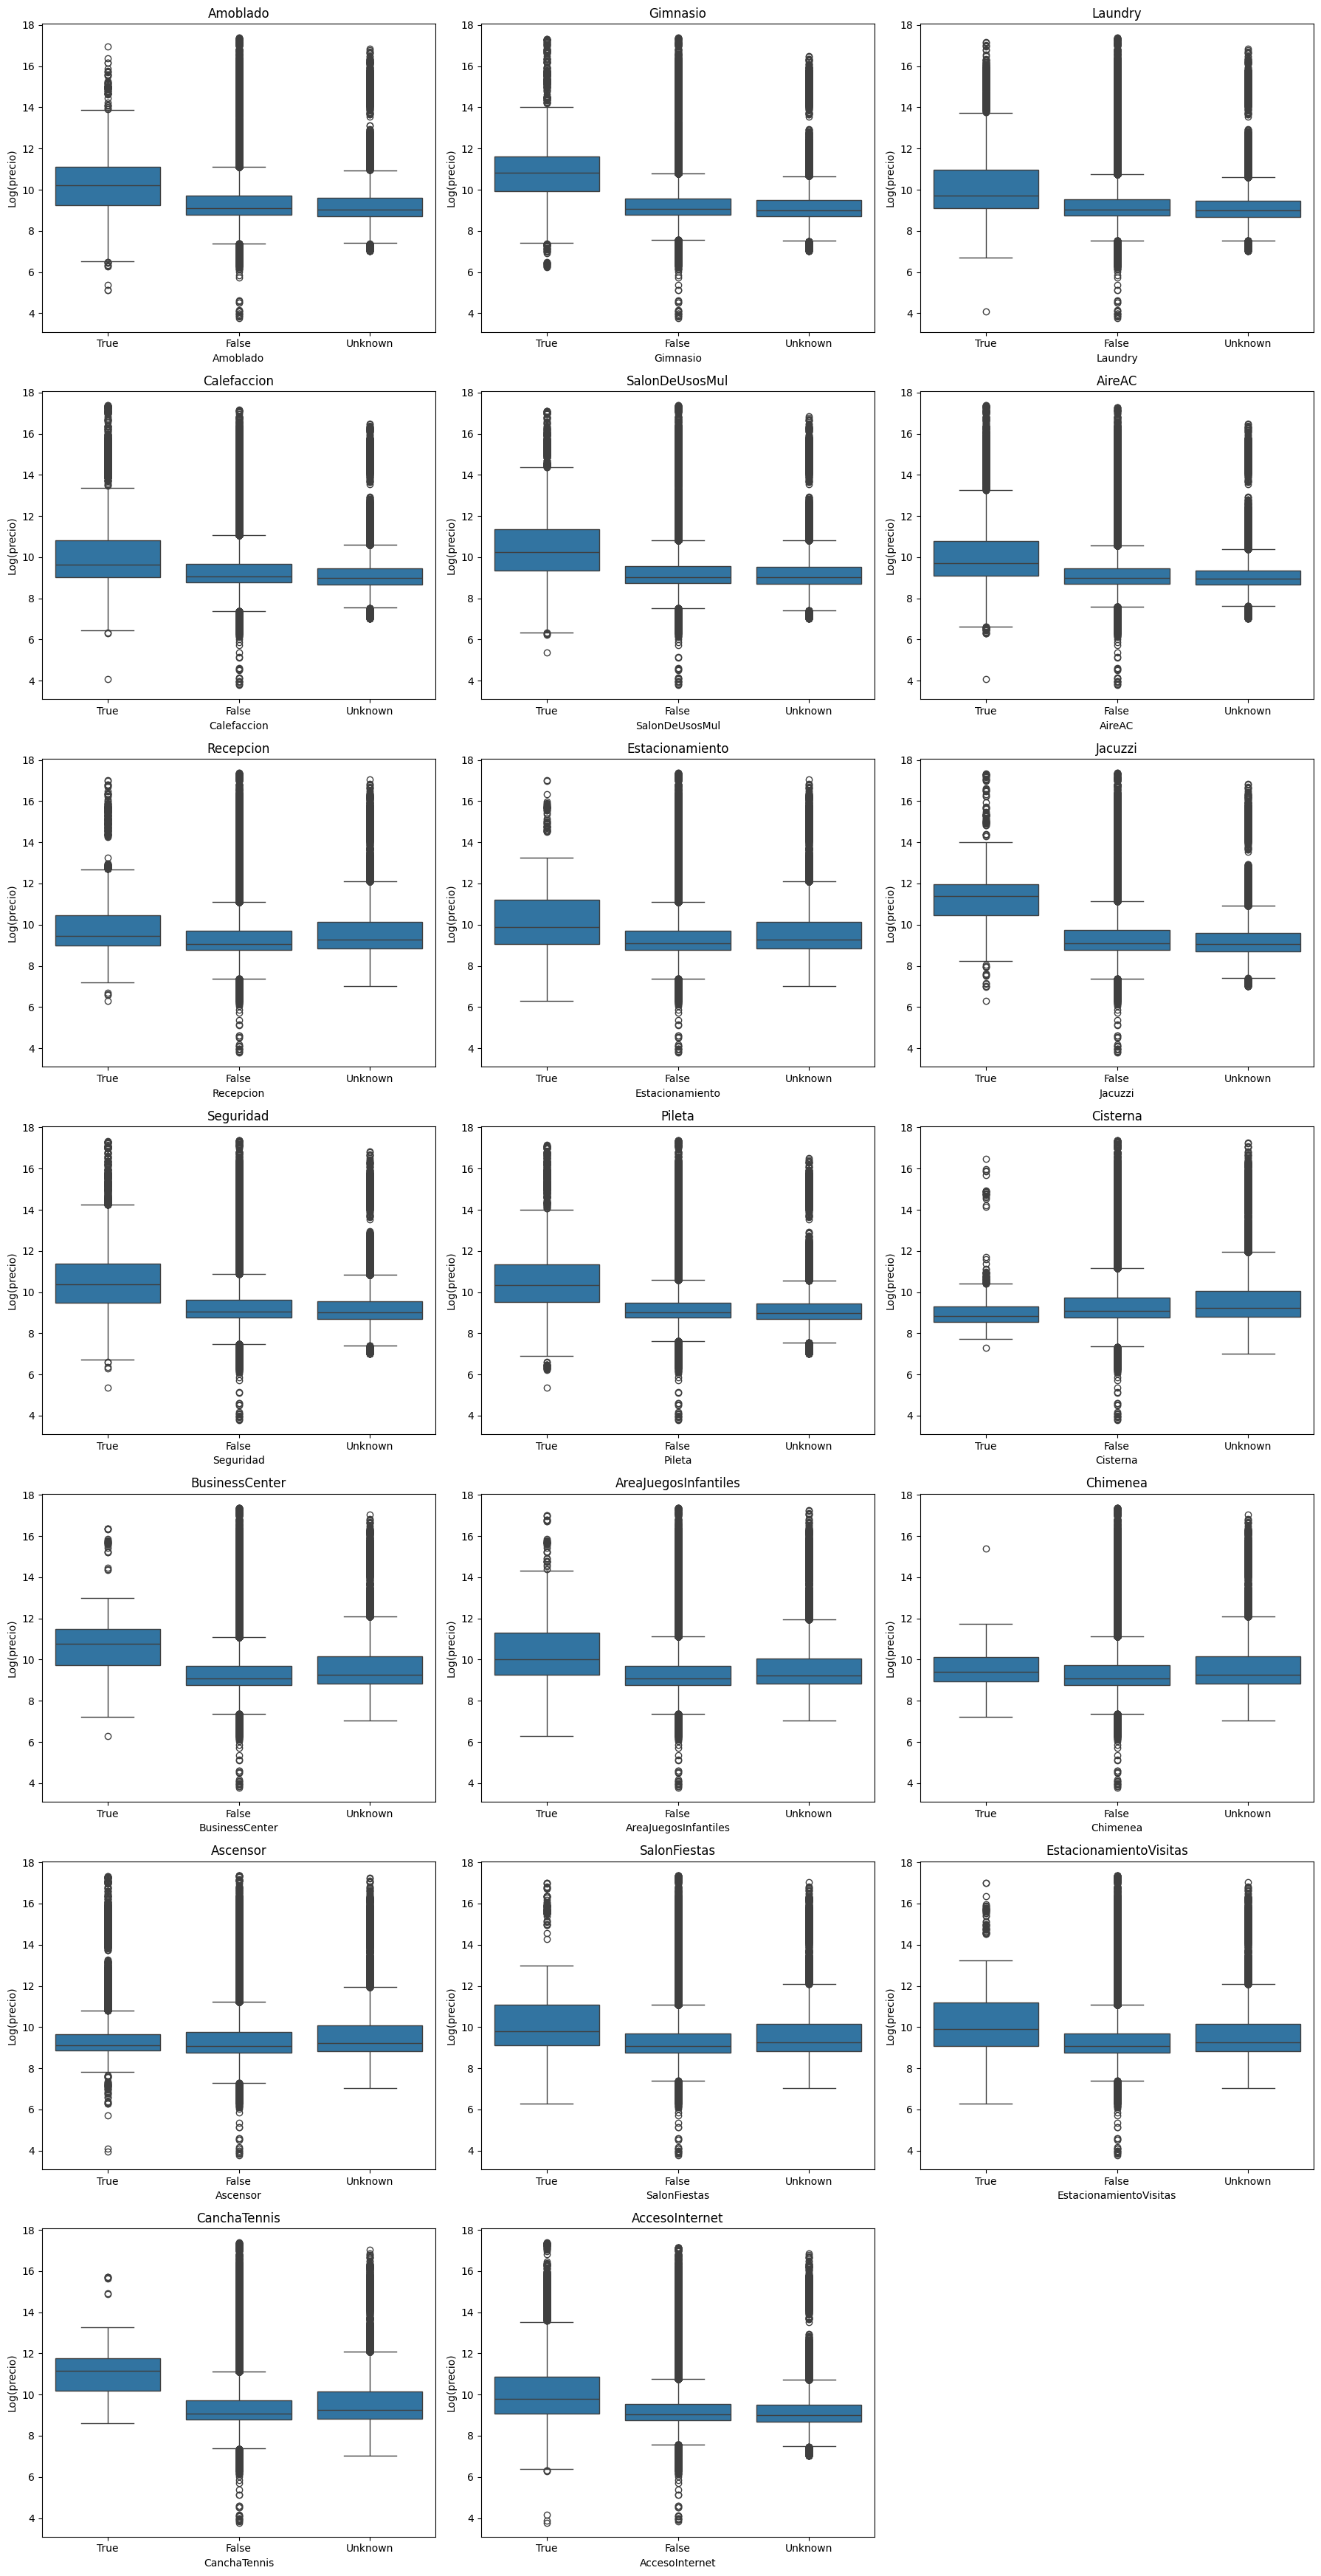

In [93]:
plot_boolean_impact(df_clean, bool_cols=cleaning_config["bool_cols"], target_col=TARGET, n_cols=3)

- Cisterna: no hay impacto significativo, removemos
- BusinessCenter: hay cierto impacto, conservamos
- AreaJuegosInfantiles: impacto moderado, removemos
- Chimenea: no hay impacto significativo , removemos
- EstacionamientoVisitas: impacto moderado, removemos
- CanchaTennis: alto impacto, conservamos
- AccesoInternet: impacto moderado -- removemos (es muy raro que haya tantas propiedades sin internet, puede estar mal el dato)
- Estacionamiento: impacto moderado -- conservamos
- Ascensor: bajo impacto -- removemos (igual que AccesoInternet, es muy raro que en AMBA haya tan pocos ascensores)
- SalonFiestas: pareciera tener el mismo impacto que SalonDeUsosMul. Vamos a unificar las columnas (creamos una nueva columna SUM que sea SalonFiestas OR SalonDeUsosMul)

In [94]:
cleaning_config_2 = cleaning_config.copy()
cleaning_config_2["amenities_to_combine"] = {"col1": "SalonDeUsosMul", "col2": "SalonFiestas", "new_name": "SUM"}
cleaning_config_2["cols_to_drop"] += ["Cisterna", "AreaJuegosInfantiles", "Chimenea", "EstacionamientoVisitas", "AccesoInternet", "Ascensor"]

df_clean_2 = clean_data(
    df,
    config=cleaning_config_2
)

--- Starting Data Cleaning Pipeline ---
Dropping columns: TIPOPROPIEDAD, SistContraIncendios, AreaCine, SitioOrigen, Cisterna, AreaJuegosInfantiles, Chimenea, EstacionamientoVisitas, AccesoInternet, Ascensor
Unifying columns to boolean format: Amoblado, Gimnasio, Laundry, Calefaccion, SalonDeUsosMul, AireAC, Recepcion, Estacionamiento, Jacuzzi, Seguridad, Pileta, BusinessCenter, SalonFiestas, CanchaTennis
Combining 'SalonDeUsosMul' and 'SalonFiestas' into 'SUM'...
Converting column 'Antiguedad' to numeric...
Converting column 'MesListing' to datetime...
Replacing negative values with NaN in: Cocheras, Banos
  - Found 12 negative values in 'Cocheras'.
  - Found 2 negative values in 'Banos'.
Correcting inconsistencies between 'Ambientes' and 'Dormitorios'...
  - Found 779 rows where 'Dormitorios' > 'Ambientes'. Replacing 'Dormitorios' with NaN.
Correcting inconsistencies between 'STotalM2' and 'SConstrM2'...
  - Found 10432 rows where 'SConstrM2' > 'STotalM2'. Replacing 'SConstrM2' with 

In [95]:
df_clean_2.head()

,id_grid,MesListing,STotalM2,SConstrM2,Dormitorios,Banos,Ambientes,Amoblado,Antiguedad,BusinessCenter,...,CanchaTennis,ITE_ADD_CITY_NAME,ITE_ADD_STATE_NAME,ITE_ADD_NEIGHBORHOOD_NAME,ITE_TIPO_PROD,LONGITUDE,LATITUDE,precio_pesos_constantes,year,SUM
0,59362,2022-08-01,39.0,36.0,1.0,1.0,2,False,0.0,False,...,False,Caseros,Bs.As. G.B.A. Oeste,Caseros,N,-58.566145,-34.599299,6.279294e+03,2022,False
1,68287,2021-04-01,47.0,40.0,1.0,1.0,2,False,7.0,False,...,False,Capital Federal,Capital Federal,Núñez,U,-58.473708,-34.551759,1.092339e+04,2021,False
2,59774,2021-09-01,128.0,63.0,1.0,1.0,3,False,40.0,False,...,False,Capital Federal,Capital Federal,NaN,U,-58.385136,-34.599685,1.081992e+04,2021,False
3,62402,2022-11-01,436.0,436.0,2.0,3.0,8,<NA>,50.0,<NA>,...,False,Capital Federal,Capital Federal,Recoleta,U,-58.393617,-34.585162,1.230069e+05,2022,<NA>
4,57804,2021-04-01,300.0,300.0,2.0,4.0,6,False,0.0,False,...,False,Capital Federal,Capital Federal,Monserrat,U,-58.376592,-34.610603,7.714647e+06,2021,False


In [96]:
df_clean.to_csv("../data/processed/dev_set_clean.csv", index=False)